In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
df = pd.read_csv('https://github.com/jreades/i2p/raw/master/data/2020-08-24-sample-listings-simple.csv')

In [16]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs='epsg:4326')).to_crs('epsg:27700')

<AxesSubplot:>

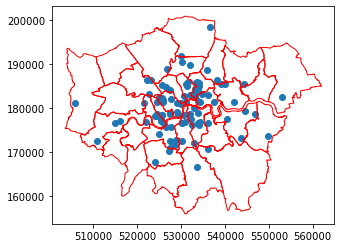

In [18]:
ax = gdf.plot()
boros.plot(ax=ax, facecolor='none', edgecolor='r')

<AxesSubplot:>

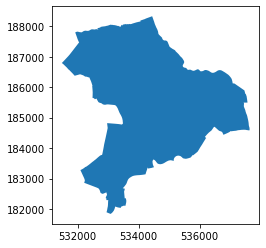

In [22]:
hackney = boros[boros.NAME=='Hackney']
hackney.plot()

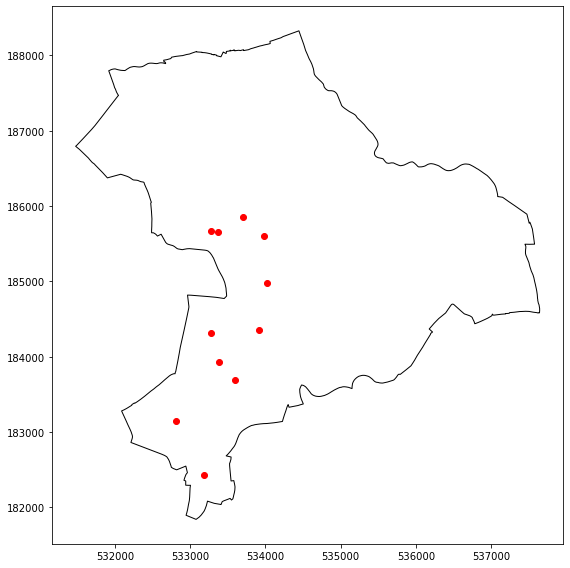

In [27]:
rs = gpd.sjoin(gdf, hackney, op='within')
ax = boros[boros.NAME=='Hackney'].plot(edgecolor='k', facecolor='none', figsize=(8,8))
rs.plot(ax=ax, color='r')
plt.tight_layout()
plt.savefig('img/Hackney.png', dpi=150)

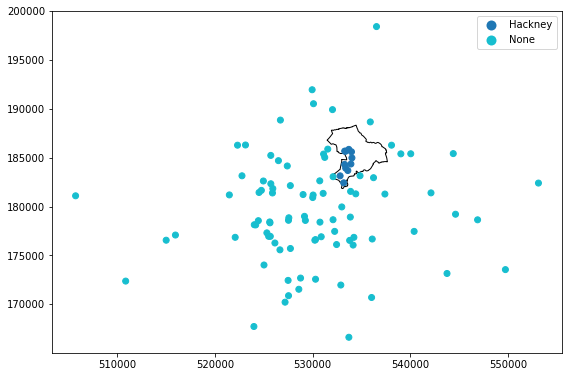

In [39]:
rs = gpd.sjoin(gdf, hackney, how='left', op='within')
rs.NAME.fillna('None', inplace=True)
ax = boros[boros.NAME=='Hackney'].plot(edgecolor='k', facecolor='none', figsize=(8,8))
rs.plot(ax=ax, column='NAME', legend=True)
plt.tight_layout()
plt.savefig('img/Hackney-Left.png', dpi=150)

In [35]:
rs.NAME.fillna('None', inplace=True)

<AxesSubplot:>

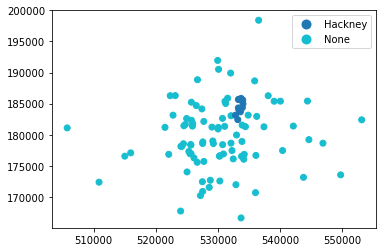

In [37]:
rs.plot(column='NAME', legend=True)

In [29]:
# Not supported
gpd.sjoin(boros, hackney, op='touches')

ValueError: `op` was "touches" but is expected to be in ['contains', 'within', 'intersects']